## Customer Churn - Abhijith Rao

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
import os
print(os.listdir("D:\coventry\ML\customer churn"))
#Give the location for the folder containing the dataset to view its content.



['agedist_pie.png', 'boxplot churn vs tenure.png', 'Case Study ML Telecom.ipynb', 'churn variation skew.png', 'churn_contracttype.png', 'churn_multiplefeature.png', 'comparison of scores.xlsx', 'contract.png', 'dependents.png', 'Draft submission.docx', 'EDA and Prediction.docx', 'line_monthlyvsdensity.png', 'main.docx', 'main2.docx', 'mine.ipynb', 'monthlycharges.png', 'telecom_churn.csv', 'tele_churn.docx', '~$main.docx', '~$main2.docx']


In [2]:
telecom_cust = pd.read_csv("D:\\coventry\\ML\\customer churn\\telecom_churn.csv")
#Give the location for the dataset along its correct name in which it had been saved on the work machine.

telecom_cust.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Checking the data types of all the columns

In [4]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Converting Total Charges to a numerical data type.

In [5]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce') # coerce sets error to NaN
telecom_cust.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since there are 11 missing values for Total Charges. 
We have to replace or remove these 11 rows from our data set.

# Removing missing values

In [6]:
telecom_cust.dropna(inplace = True)

# Choosing data frame 2 with the colums from 1 to 20 

In [7]:
df2 = telecom_cust.iloc[:,1:]

Replacing 1 and 0 in place of 'yes' and 'no' in columns

In [8]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)


Creating dummies is a technique for converting categorical variables into dummy variables

In [9]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

Plotting correlation of "Churn" with other variables:

<AxesSubplot:ylabel='Frequency'>

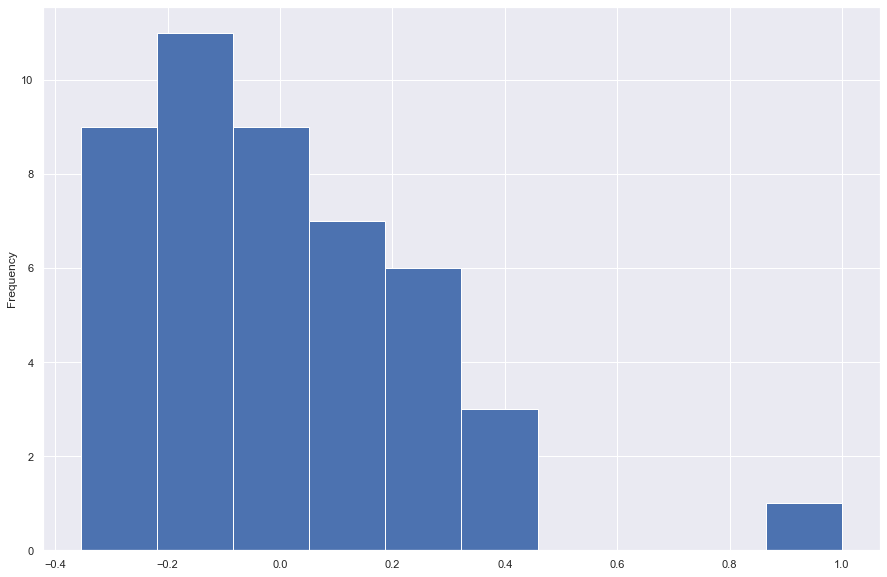

In [10]:
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='hist')


In [11]:
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='barh',rot=0) 
# Rotaion is set 0 to note the name as it is. Also barh means bar in horizontal format.


<AxesSubplot:>

Here the Positive churn determines that the customers are likely to leave whereas the inverse means the customers are more likely to stay.

For example: A customer wiht 2 year tenure is more likely to stay than someone with monthly subscription.
Also, we can see that the dataset is not very asymmetrical in nature.

Note: We are trying to predict the Churn column, hence it is wise to not consider it in skewness test.


# Data Exploration

1 - Demographics -Plotting gender, age range, patner and dependent status of the customers

A - Gender Distribution

In [12]:
gender = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', rot = 0) # rotation set to 0
                                                                         

gender.set_ylabel('Percentage of Customers')
gender.set_xlabel('Gender')
gender.set_title('Gender Distribution')


Text(0.5, 1.0, 'Gender Distribution')

B - Age Range

Text(0.5, 1.0, 'Percentage of age division')

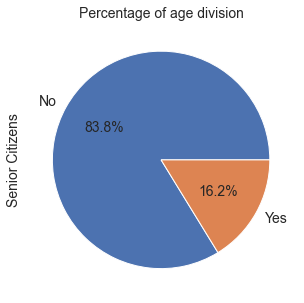

In [13]:
age = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 14 )                                                                           
age.set_ylabel('Senior Citizens',fontsize = 14)
age.set_title('Percentage of age division', fontsize = 14)


C - Partner Status

Text(0.5, 1.0, 'Customers with  partners')

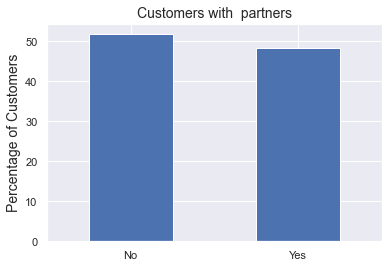

In [14]:
ps = (telecom_cust['Partner'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', rot = 0)

ps.set_ylabel('Percentage of Customers',size = 14)
ps.set_title('Customers with  partners',size = 14)


D - Dependent Status

Text(0.5, 1.0, 'Customers with dependents')

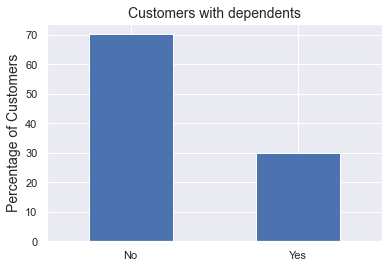

In [15]:
ds = (telecom_cust['Dependents'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', rot = 0)

ds.set_ylabel('Percentage of Customers',size = 14)
ds.set_title('Customers with dependents',size = 14)


2 - Customer Account Information: Plotting tenure, contract

A - Tenure

C:\Users\itsna\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer tenure')

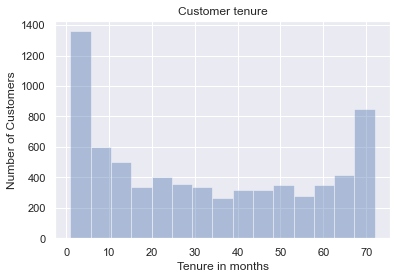

In [16]:
tenure = sns.distplot(telecom_cust['tenure'], hist=True, kde=False) # kde is set false as we do not need a line graph along plot
tenure.set_ylabel('Number of Customers')
tenure.set_xlabel('Tenure in months')
tenure.set_title('Customer tenure')


B - Contract

Text(0.5, 1.0, 'Customers by Contract Type')

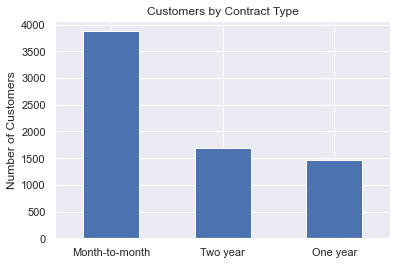

In [17]:
contract = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0)
contract.set_ylabel('Number of Customers')
contract.set_title('Customers by Contract Type')

3 - Distribution of various services used by customers

In [18]:
# check for services
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

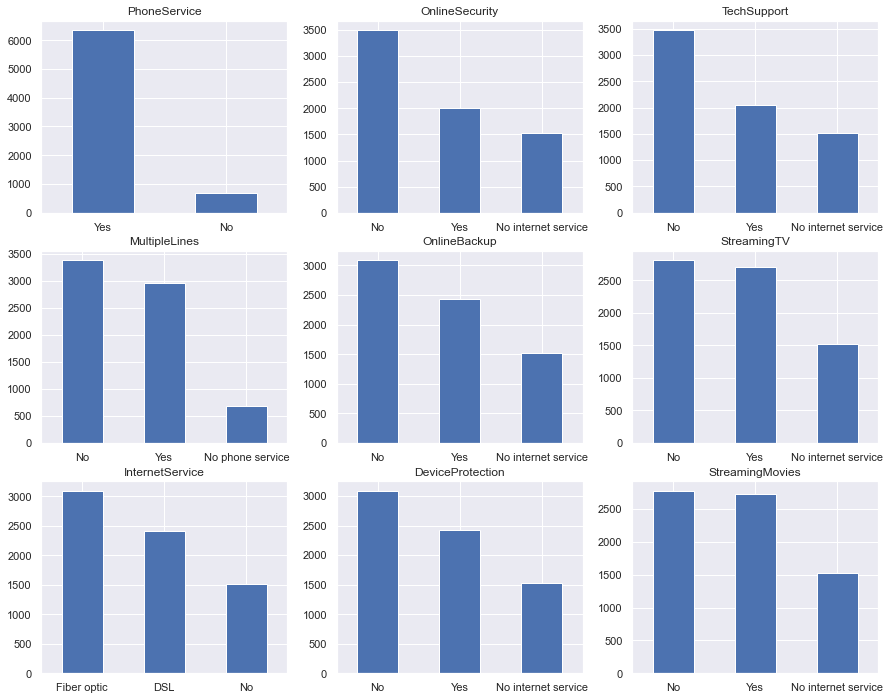

In [19]:
#Dealing with services
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12)) # divides plotting into 3x3
for i, item in enumerate(services):
    if i < 3: # filling first column of 3 rows
        service = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6: # filling second column of 3 rows
        service = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9: # filling last column of 3 rows
        service = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    service.set_title(item)


4 - Relation between monthly and total charges

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

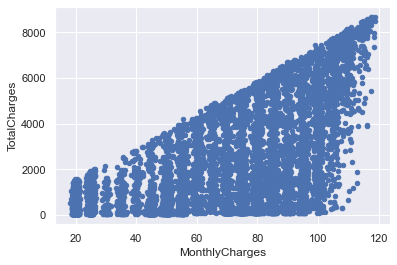

In [20]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')


Total charges increases as the monthly bill for a customer increases

5 - Lastly, predictor variable (Churn) and its interaction with other variables as was found out in the correlation plot.

Text(0.5, 1.0, 'Churn Rate')

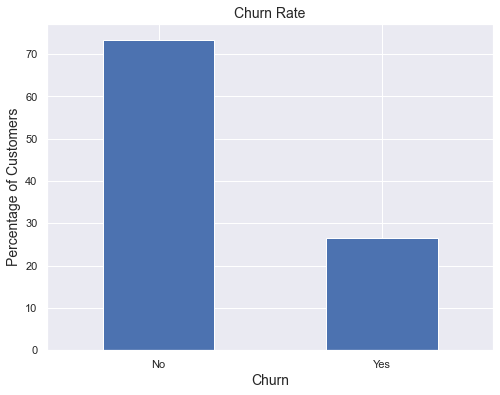

In [21]:
#check relation of churn with all other featurs
churn = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',rot = 0,figsize = (8,6))
churn.set_ylabel('Percentage of Customers',size = 14)
churn.set_xlabel('Churn',size = 14)
churn.set_title('Churn Rate', size = 14)

A - Churn vs Tenure 

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

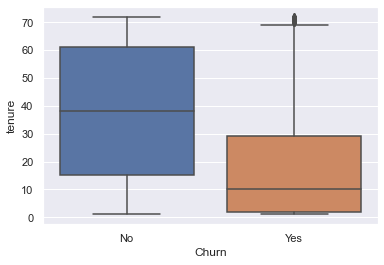

In [22]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

B - Churn by Contract Type

Text(0.5, 1.0, 'Churn by Contract Type')

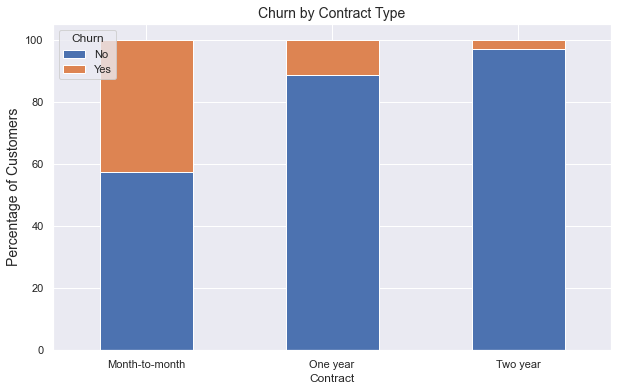

In [23]:
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

churn = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',stacked = True, rot = 0, figsize = (10,6)) 
# Stacked is set true for dual plots in a single bar

churn.legend(title = 'Churn')
churn.set_ylabel('Percentage of Customers',size = 14)
churn.set_title('Churn by Contract Type',size = 14)

C -  Churn by Seniority

Text(0.5, 1.0, 'Churn by Seniority')

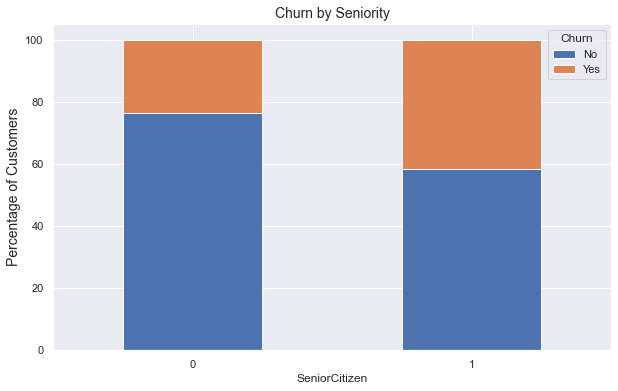

In [24]:
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

churn = (seniority_churn.T*100.0 /seniority_churn.T.sum()).T.plot(kind='bar',stacked = True, rot = 0, figsize = (10,6)) 
# Stacked is set true for dual plots in a single bar

churn.legend(title = 'Churn')
churn.set_ylabel('Percentage of Customers',size = 14)
churn.set_title('Churn by Seniority',size = 14)

D - Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

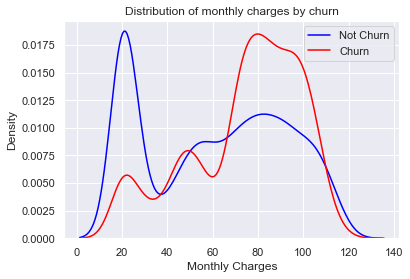

In [25]:
churn = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ], color="Blue")
churn = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ], color="Red")
churn.legend(["Not Churn","Churn"],loc='upper right')
churn.set_ylabel('Density')
churn.set_xlabel('Monthly Charges')
churn.set_title('Distribution of monthly charges by churn')

E - Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

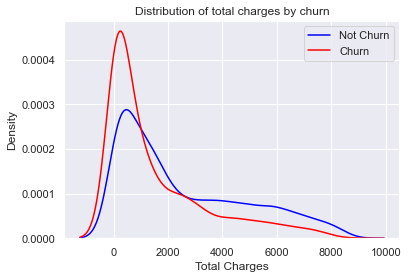

In [26]:
churn = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ], color="Blue")
churn = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ], color="Red")
churn.legend(["Not Churn","Churn"],loc='upper right')
churn.set_ylabel('Density')
churn.set_xlabel('Total Charges')
churn.set_title('Distribution of total charges by churn')

# Scaling the data.

In [27]:
# using dummy data
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features



# Applying Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost.

# A - Logistic Regression

In [28]:
# Creating Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) 
# Ideal Random state is 42 and test size 0.2, but I got better results for this test size and other values of random state. 
# I usually try different random state like 1,42,50,99,101 and not use a random generator since the results are not reproducable.

In [29]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


C:\Users\itsna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn import metrics # to print accurace of model
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

pred = model.predict(X_test)
# Print the prediction accuracy
print ('Accuracy Score : ',metrics.accuracy_score(y_test, pred))
print ('Precision Score : ',metrics.precision_score(y_test, pred))
print ('Recall Score : ',metrics.recall_score(y_test, pred))
print ('F1 Score : ',metrics.f1_score(y_test, pred))
print ('ROC_AUC_Score : ',metrics.roc_auc_score(y_test, pred))

Accuracy Score :  0.820184790334044
Precision Score :  0.6904761904761905
Recall Score :  0.5561643835616439
F1 Score :  0.6160849772382399
ROC_AUC_Score :  0.7344161649094209


In [31]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)

In [32]:
print (weights.sort_values(ascending = False)[:10].plot(kind='barh'))

AxesSubplot(0.125,0.125;0.775x0.755)


Positive Churn tells us that the frequency of customers likely to leave.

AxesSubplot(0.125,0.125;0.775x0.755)


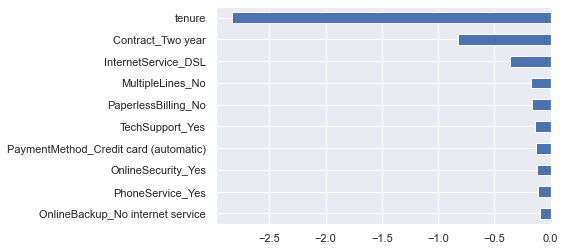

In [33]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='barh'))

Negative Churn tells us that the frequency of customers likely to stay.

# B - Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , random_state =42, max_features = "auto", max_leaf_nodes = 30)
# n_estimator is number of trees(default is set to 10) in a forest
# We have chosen 1000 as value to oversample 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

model_rf.fit(X_train, y_train)

# Make predictions
pred = model_rf.predict(X_test)

print ('Accuracy Score : ',metrics.accuracy_score(y_test, pred))
print ('Precision Score : ',metrics.precision_score(y_test, pred))
print ('Recall Score : ',metrics.recall_score(y_test, pred))
print ('F1 Score : ',metrics.f1_score(y_test, pred))
print ('ROC_AUC_Score : ',metrics.roc_auc_score(y_test, pred))

Accuracy Score :  0.820184790334044
Precision Score :  0.7333333333333333
Recall Score :  0.4821917808219178
F1 Score :  0.5818181818181819
ROC_AUC_Score :  0.7103857176662371


<AxesSubplot:>

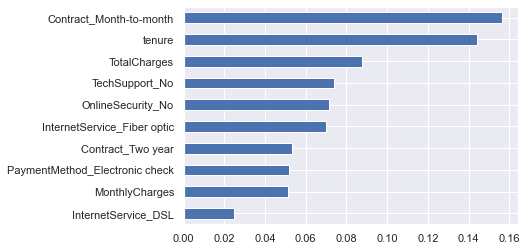

In [36]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)

weights.sort_values()[-10:].plot(kind = 'barh')

# C - Support Vecor Machine (SVM)

In [37]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

model.svm.fit(X_train,y_train)
pred = model.svm.predict(X_test)

print ('Accuracy Score : ',metrics.accuracy_score(y_test, pred))
print ('Precision Score : ',metrics.precision_score(y_test, pred))
print ('Recall Score : ',metrics.recall_score(y_test, pred))
print ('F1 Score : ',metrics.f1_score(y_test, pred))
print ('ROC_AUC_Score : ',metrics.roc_auc_score(y_test, pred))

Accuracy Score :  0.820184790334044
Precision Score :  0.6931034482758621
Recall Score :  0.5506849315068493
F1 Score :  0.6137404580152672
ROC_AUC_Score :  0.7326361317802961


In [39]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,pred))  

[[953  89]
 [164 201]]


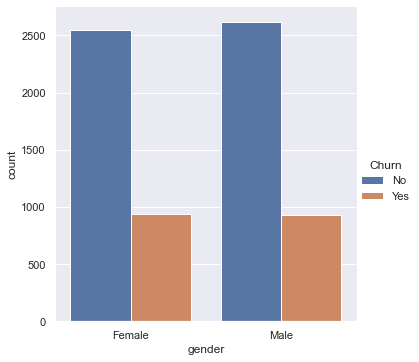

In [40]:
svmplt = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

# Note: Since 'SVC' object has no attribute 'feature_importances_' we are not using weights.

# D - AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

model.fit(X_train,y_train)
pred = model.predict(X_test)
print ('Accuracy Score : ',metrics.accuracy_score(y_test, pred))
print ('Precision Score : ',metrics.precision_score(y_test, pred))
print ('Recall Score : ',metrics.recall_score(y_test, pred))
print ('F1 Score : ',metrics.f1_score(y_test, pred))
print ('ROC_AUC_Score : ',metrics.roc_auc_score(y_test, pred))

Accuracy Score :  0.8159203980099502
Precision Score :  0.6934306569343066
Recall Score :  0.5205479452054794
F1 Score :  0.594679186228482
ROC_AUC_Score :  0.7199668708752924


# E - XGBoost

In [42]:
from xgboost import XGBClassifier
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy Score : ',metrics.accuracy_score(y_test, pred))
print ('Precision Score : ',metrics.precision_score(y_test, pred))
print ('Recall Score : ',metrics.recall_score(y_test, pred))
print ('F1 Score : ',metrics.f1_score(y_test, pred))
print ('ROC_AUC_Score : ',metrics.roc_auc_score(y_test, pred))

C:\Users\itsna\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score :  0.8095238095238095
Precision Score :  0.6600660066006601
Recall Score :  0.547945205479452
F1 Score :  0.5988023952095809
ROC_AUC_Score :  0.7245484184786896


Since, we have performed EDA we know that the class distribution is more balanced in this dataset.Hence, Accuracy is used to evaluate such models. 